# Understanding Well-being: How Demographic and Behaviors Shape Health

- Understanding the complex determinants of health quality is important both in shaping effective public health strategies and improving individual wellness. 

- Our study addresses this issue by analyzing demographic and behavioral data through different types of prediction models chosen based on expected performance and the nature of our problem, to uncover which factors significantly impact an individual's health status, eventually produce a model that predicts an individuals wellbeing.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import klib
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

% # %load tex-macros
<div hidden>
\newcommand{\require}[1]{}

$\require{begingroup}\require{newcommand}$
$\long\def \forcecommand #1{\providecommand{#1}{}\renewcommand{#1}}$
$\forcecommand{\defeq}{\stackrel{\small\bullet}{=}}$
$\forcecommand{\ra}{\rangle}$
$\forcecommand{\la}{\langle}$
$\forcecommand{\pr}{{\mathbb P}}$
$\forcecommand{\qr}{{\mathbb Q}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\av}{{\boldsymbol{a}}}$
$\forcecommand{\bv}{{\boldsymbol{b}}}$
$\forcecommand{\cv}{{\boldsymbol{c}}}$
$\forcecommand{\dv}{{\boldsymbol{d}}}$
$\forcecommand{\ev}{{\boldsymbol{e}}}$
$\forcecommand{\fv}{{\boldsymbol{f}}}$
$\forcecommand{\gv}{{\boldsymbol{g}}}$
$\forcecommand{\hv}{{\boldsymbol{h}}}$
$\forcecommand{\nv}{{\boldsymbol{n}}}$
$\forcecommand{\sv}{{\boldsymbol{s}}}$
$\forcecommand{\tv}{{\boldsymbol{t}}}$
$\forcecommand{\uv}{{\boldsymbol{u}}}$
$\forcecommand{\vv}{{\boldsymbol{v}}}$
$\forcecommand{\wv}{{\boldsymbol{w}}}$
$\forcecommand{\zerov}{{\mathbf{0}}}$
$\forcecommand{\onev}{{\mathbf{0}}}$
$\forcecommand{\phiv}{{\boldsymbol{\phi}}}$
$\forcecommand{\cc}{{\check{C}}}$
$\forcecommand{\xv}{{\boldsymbol{x}}}$
$\forcecommand{\Xv}{{\boldsymbol{X}\!}}$
$\forcecommand{\yv}{{\boldsymbol{y}}}$
$\forcecommand{\Yv}{{\boldsymbol{Y}}}$
$\forcecommand{\zv}{{\boldsymbol{z}}}$
$\forcecommand{\Zv}{{\boldsymbol{Z}}}$
$\forcecommand{\Iv}{{\boldsymbol{I}}}$
$\forcecommand{\Jv}{{\boldsymbol{J}}}$
$\forcecommand{\Cv}{{\boldsymbol{C}}}$
$\forcecommand{\Ev}{{\boldsymbol{E}}}$
$\forcecommand{\Fv}{{\boldsymbol{F}}}$
$\forcecommand{\Gv}{{\boldsymbol{G}}}$
$\forcecommand{\Hv}{{\boldsymbol{H}}}$
$\forcecommand{\alphav}{{\boldsymbol{\alpha}}}$
$\forcecommand{\epsilonv}{{\boldsymbol{\epsilon}}}$
$\forcecommand{\betav}{{\boldsymbol{\beta}}}$
$\forcecommand{\deltav}{{\boldsymbol{\delta}}}$
$\forcecommand{\gammav}{{\boldsymbol{\gamma}}}$
$\forcecommand{\etav}{{\boldsymbol{\eta}}}$
$\forcecommand{\piv}{{\boldsymbol{\pi}}}$
$\forcecommand{\thetav}{{\boldsymbol{\theta}}}$
$\forcecommand{\tauv}{{\boldsymbol{\tau}}}$
$\forcecommand{\muv}{{\boldsymbol{\mu}}}$
$\forcecommand{\sd}{\text{SD}}$
$\forcecommand{\se}{\text{SE}}$
$\forcecommand{\med}{\text{median}}$
$\forcecommand{\median}{\text{median}}$
$\forcecommand{\Ber}{{\text{Ber}}}$
$\forcecommand{\Bin}{{\text{Bin}}}$
$\forcecommand{\Geo}{{\text{Geo}}}$
$\forcecommand{\Unif}{{\text{Unif}}}$
$\forcecommand{\Poi}{{\text{Poi}}}$
$\forcecommand{\Exp}{{\text{Exp}}}$
$\forcecommand{\Chisq}{{\chi^2}}$
$\forcecommand{\N}{\mathbb{N}}$
$\forcecommand{\iid}{{\stackrel{iid}{\sim}}}$
$\forcecommand{\px}{p_{X}}$
$\forcecommand{\fx}{f_{X}}$
$\forcecommand{\Fx}{F_{X}}$
$\forcecommand{\py}{p_{Y}}$
$\forcecommand{\pxy}{p_{X,Y}}$
$\forcecommand{\po}{{p_0}}$
$\forcecommand{\pa}{{p_a}}$
$\forcecommand{\Xbar}{\overline{X}}$
$\forcecommand{\Ybar}{\overline{Y}}$
$\forcecommand{\Zbar}{\overline{Z}}$
$\forcecommand{\nXbar}{n \cdot \overline{X}}$
$\forcecommand{\nYbar}{n \cdot \overline{Y}}$
$\forcecommand{\nZbar}{n \cdot \overline{Z}}$
$\forcecommand{\Xn}{X_1, X_2, \dots, X_n}$
$\forcecommand{\Xm}{{X_1, X_2, \dots, X_m}}$
$\forcecommand{\Yn}{Y_1, Y_2, \dots, Y_n}$
$\forcecommand{\Ym}{{Y_1, Y_2, \dots, Y_m}}$
$\forcecommand{\sumXn}{X_1 + X_2 + \dots + X_n}$
$\forcecommand{\sumym}{Y_1 + Y_2 + \dots + Y_m}$
$\forcecommand{\la}{\ell_\alpha}$
$\forcecommand{\ua}{u_\alpha}$
$\forcecommand{\at}{{\alpha/2}}$
$\forcecommand{\mux}{\mu_{X}}$
$\forcecommand{\muy}{\mu_{Y}}$
$\forcecommand{\sx}{\sigma_{X}}$
$\forcecommand{\sy}{\sigma_{Y}}$
$\forcecommand{\pvalue}{$p$-value}$
$\forcecommand{\Ho}{H_{0}}$
$\forcecommand{\Ha}{H_{a}}$
$\forcecommand{\pvalue}{p\text{-value}}$
$\forcecommand{\E}{\mathbb{E}}$
$\newcommand{\E}{\mathbb{E}}$
\vskip-\parskip
\vskip-\baselineskip
</div>

Dataset from Kaggle.

In [2]:
df = pd.read_csv("sleep75.csv", usecols=["age", "educ", "male", "inlf", "sleep", "slpnaps", "totwrk", "selfe", "marr", "gdhlth"])
df

age  educ  gdhlth  inlf  male  marr  selfe  sleep  slpnaps  totwrk
0     32    12       0     1     1     1      0   3113     3163    3438
1     31    14       1     1     1     0      1   2920     2920    5020
2     44    17       1     1     1     1      1   2670     2760    2815
3     30    12       1     1     0     1      1   3083     3083    3786
4     64    14       1     1     1     1      0   3448     3493    2580
..   ...   ...     ...   ...   ...   ...    ...    ...      ...     ...
701   45    12       1     0     0     1      0   2985     3385    2026
702   34    10       0     0     1     1      0   3520     3535     675
703   37    12       1     0     0     1      0   3510     3510    1851
704   54    17       1     0     0     1      1   2970     3000    1961
705   30    16       1     0     0     1      0   2970     3415    2363

[706 rows x 10 columns]

In [3]:
df.describe()

age        educ      gdhlth        inlf        male       marr  \
count  706.000000  706.000000  706.000000  706.000000  706.000000  706.00000   
mean    38.815864   12.780453    0.890935    0.753541    0.566572    0.82153   
std     11.342637    2.784702    0.311942    0.431254    0.495900    0.38318   
min     23.000000    1.000000    0.000000    0.000000    0.000000    0.00000   
25%     29.000000   12.000000    1.000000    1.000000    0.000000    1.00000   
50%     36.000000   12.000000    1.000000    1.000000    1.000000    1.00000   
75%     48.000000   16.000000    1.000000    1.000000    1.000000    1.00000   
max     65.000000   17.000000    1.000000    1.000000    1.000000    1.00000   

            selfe        sleep      slpnaps       totwrk  
count  706.000000   706.000000   706.000000   706.000000  
mean     0.131728  3266.355524  3383.083569  2122.920680  
std      0.338435   444.413448   499.046930   947.470123  
min      0.000000   755.000000  1335.000000     0.000000  
25%      0.000000  3015.000000  3105.750000  1553.500000  
50%      0.000000  3270.500000  3369.000000  2288.000000  
75%      0.000000  3532.250000  3655.000000  2691.750000  
max      1.000000  4695.000000  6110.000000  6415.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      706 non-null    int64
 1   educ     706 non-null    int64
 2   gdhlth   706 non-null    int64
 3   inlf     706 non-null    int64
 4   male     706 non-null    int64
 5   marr     706 non-null    int64
 6   selfe    706 non-null    int64
 7   sleep    706 non-null    int64
 8   slpnaps  706 non-null    int64
 9   totwrk   706 non-null    int64
dtypes: int64(10)
memory usage: 55.3 KB


# EDA (Data Exploration)

### Description

1- Clean data

2- modify data types

3- plot exploring plots (pairplot, box plots, etc.)

In [5]:
#checking missing values
df.isnull().sum()

age        0
educ       0
gdhlth     0
inlf       0
male       0
marr       0
selfe      0
sleep      0
slpnaps    0
totwrk     0
dtype: int64

In [6]:
df.shape

(706, 10)

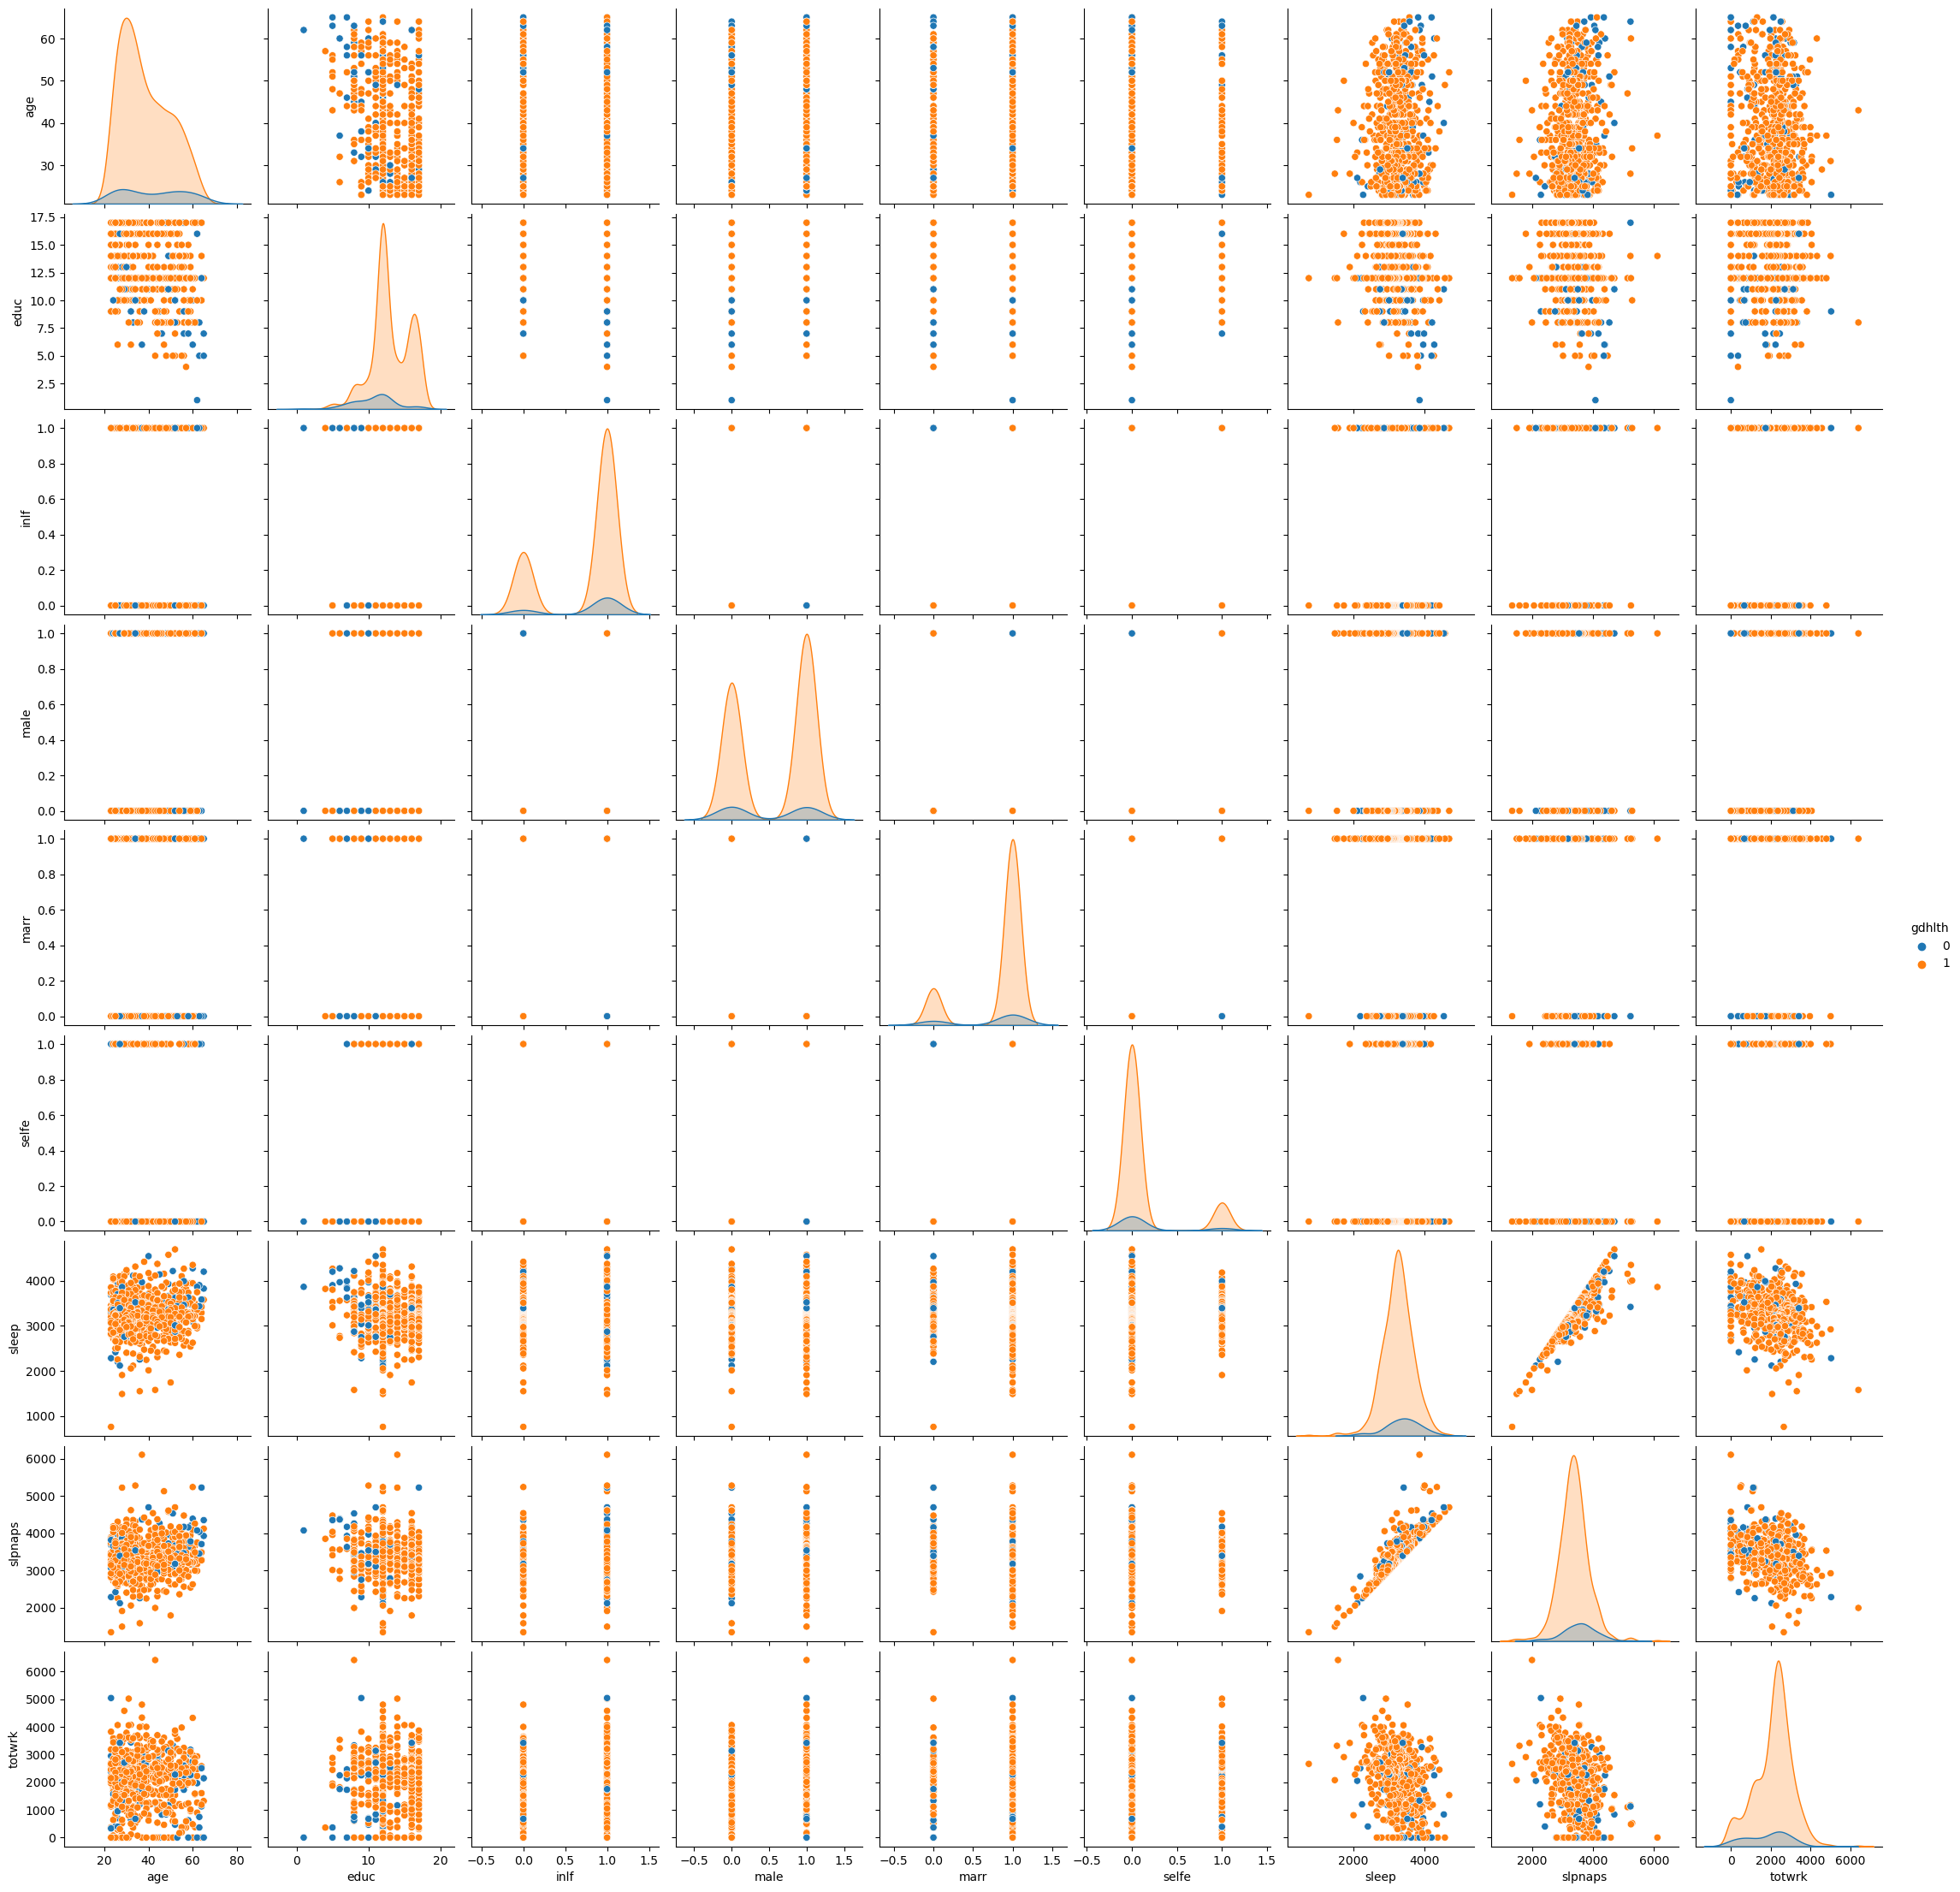

In [7]:
pairplot = sns.pairplot(df, hue = "gdhlth");
plt.show()

In [8]:
# pairplot.figure.savefig("images/pairplot.png")

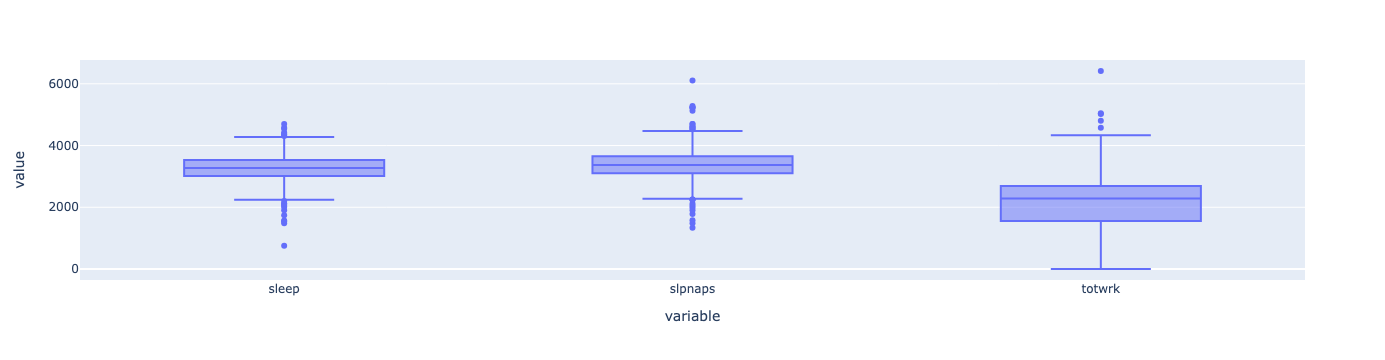

In [9]:
fig = px.box(df[["sleep", "slpnaps","totwrk"]])
fig.show()

In [10]:
# fig.write_image("images/boxplot3.png",scale = 5)

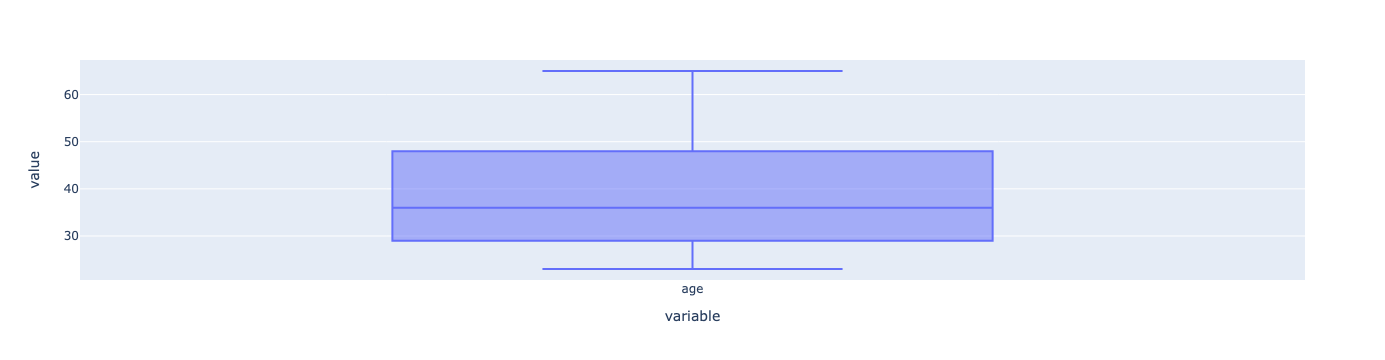

In [11]:
fig = px.box(df["age"])
fig.show()

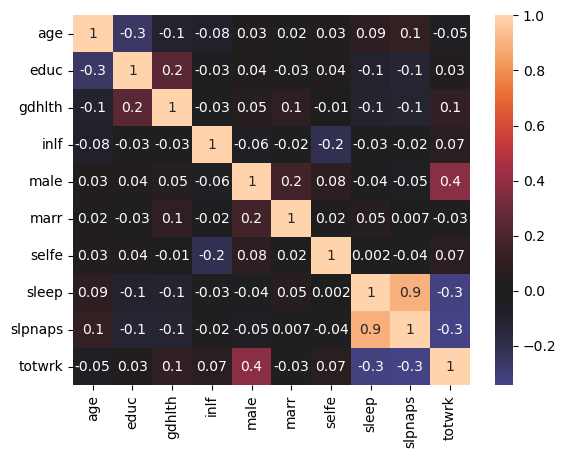

In [12]:
heatmap = sns.heatmap(df.corr(), annot=True, center=0, fmt=".1g")

In [13]:
# heatmap.figure.savefig("images/heatmap.png")

In [14]:
#data cleaning(adjust data types, drop duplicates& empty rows/cols
df_clean = klib.data_cleaning(df)

Shape of cleaned data: (706, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-80.0%)



<Axes: xlabel='sleep', ylabel='Density'>

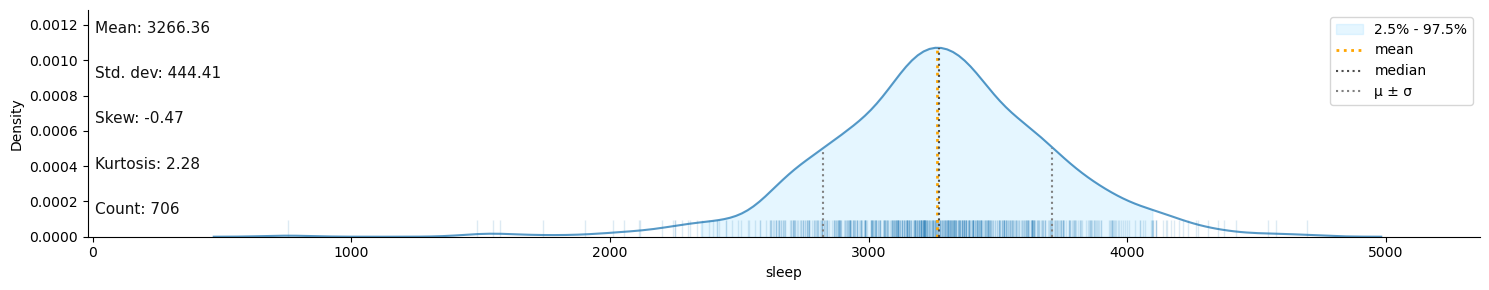

In [15]:
klib.dist_plot(df['sleep'])

<Axes: xlabel='age', ylabel='Density'>

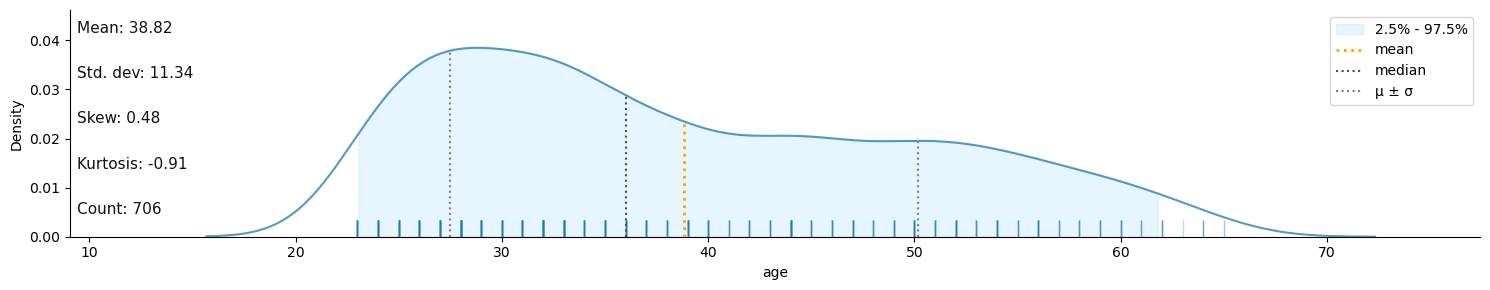

In [16]:
klib.dist_plot(df['age'])

<Axes: xlabel='educ', ylabel='Density'>

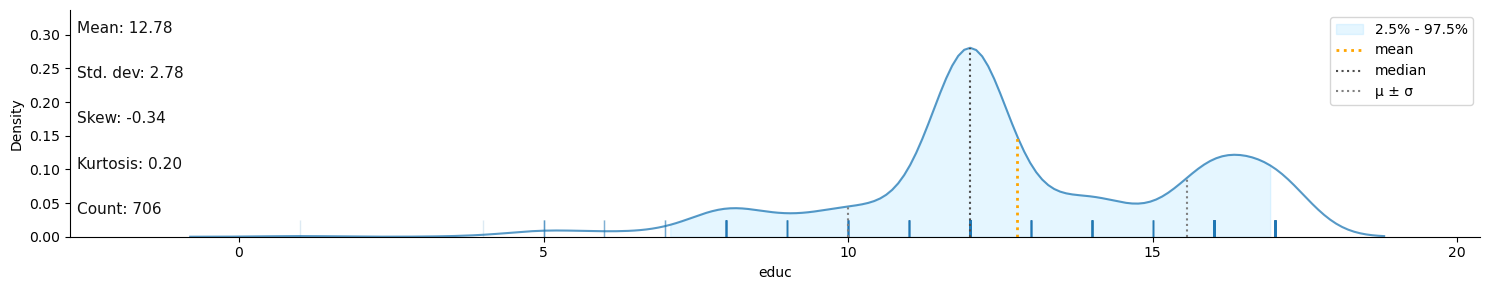

In [17]:
klib.dist_plot(df['educ'])

# Assumptions (Tests)

### Description:
Since we are doing classification, one valid model is logistic regression.  
#### Logistic Regression Assumptions
Given data $(\vec x_1, y_1), (\vec x_2, y_2), \dots, (\vec x_n, y_n)$, the logistic regression model assumes that: 

* the response variable $y_i$ is a Bernoulli random variable with parameter $p(\vec x_i)$, i.e.,
$$y | \vec x_1, \vec x_2, \dots, \vec x_p \sim \Ber(p(\vec x_i))$$
* the function $p^{-1}(\vec x)$ is a linear function of the predictor variables, i.e., $\sigma^{-1}(p(\vec x)) = \beta_0 + \beta_1 \vec x_1 + \beta_2 \vec x_2 + \dots + \beta_p \vec x_p$

In [18]:
df_w = df.copy()
df_w = df_w[['age', 'educ', 'inlf', 'male', 'marr', 'selfe', 'sleep','slpnaps', 'totwrk', 'gdhlth']]
df_w.head()

age  educ  inlf  male  marr  selfe  sleep  slpnaps  totwrk  gdhlth
0   32    12     1     1     1      0   3113     3163    3438       0
1   31    14     1     1     0      1   2920     2920    5020       1
2   44    17     1     1     1      1   2670     2760    2815       1
3   30    12     1     0     1      1   3083     3083    3786       1
4   64    14     1     1     1      0   3448     3493    2580       1

In [19]:
sigma = lambda x: np.exp(x) / (1 + np.exp(x))
model = smf.logit(f'gdhlth ~ {" + ".join(df_w.columns[:-1])}', data=df_w).fit()
model.params

Optimization terminated successfully.
         Current function value: 0.302824
         Iterations 7


Intercept   -0.483095
age         -0.002970
educ         0.270178
inlf        -0.452376
male        -0.029588
marr         0.808428
selfe       -0.438556
sleep        0.000063
slpnaps     -0.000434
totwrk       0.000271
dtype: float64

#### Assumption for Random - Residuals

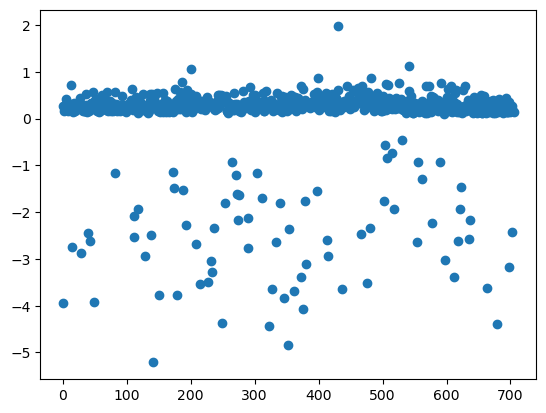

In [20]:
residuals = model.resid_pearson
plt.scatter(range(len(residuals)), residuals)
# plt.savefig('images/redisuals')

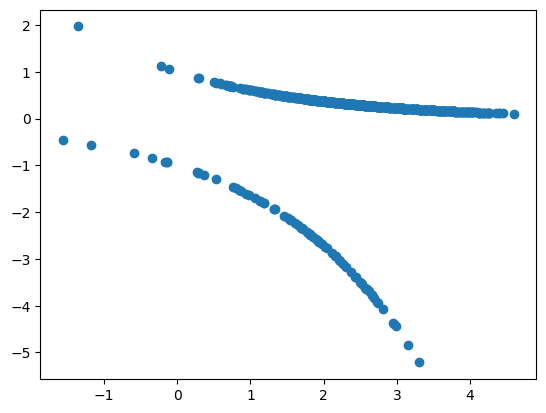

In [21]:
fitted = model.fittedvalues
plt.scatter(fitted, residuals)

#### Assumption for Linearity of Logit
We are looking for a roughly linear relationship between each predictor and the log odds.

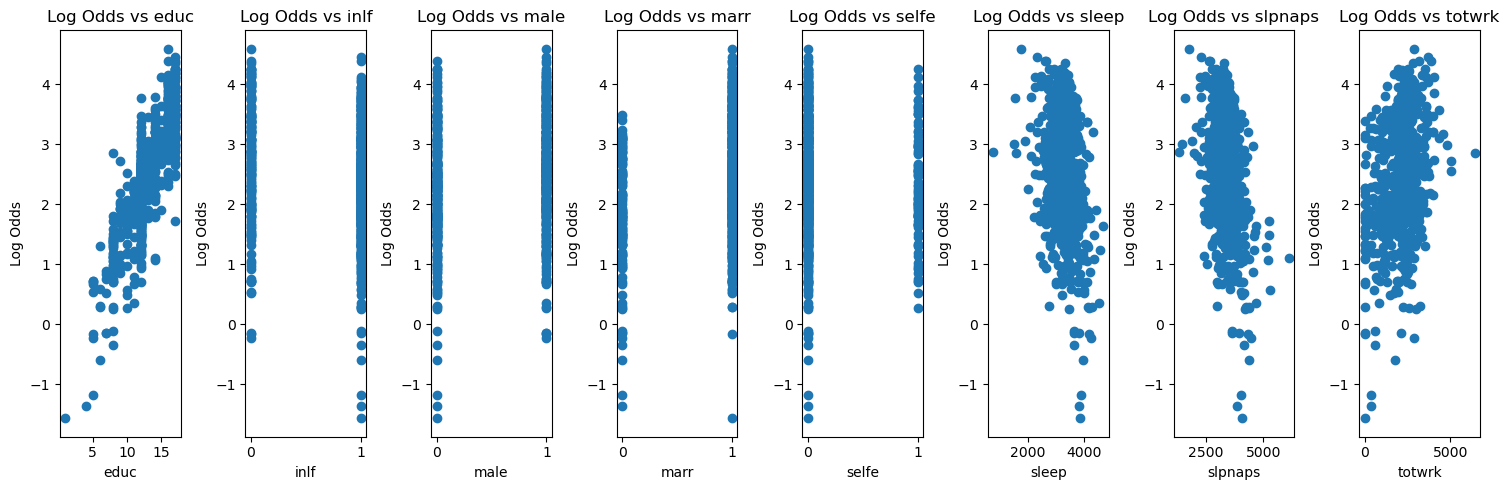

In [22]:
X = df_w.drop(columns = 'gdhlth')
pred_probs = model.predict(X)

log_odds = np.log(pred_probs / (1 - pred_probs))

# Plot the log odds against each predictor
fig, axs = plt.subplots(1, len(X.columns) - 1, figsize=(15, 5))
for i, predictor in enumerate(X.columns[1:]): 
    axs[i].scatter(df[predictor], log_odds)
    axs[i].set_title(f'Log Odds vs {predictor}')
    axs[i].set_xlabel(predictor)
    axs[i].set_ylabel('Log Odds')
plt.tight_layout()
# fig.savefig('images/logodds')
plt.show()

#### Model Diagnostics - Confusion Matrix

In [23]:
c_matrix = model.pred_table(threshold=0.5)
c_matrix

array([[  7.,  70.],
       [  3., 626.]])

In [24]:
true_pos = c_matrix[1, 1] / c_matrix[1].sum()
true_neg = c_matrix[0, 0] / c_matrix[0].sum()
false_pos = c_matrix[0, 1] / c_matrix[0].sum()
false_neg = c_matrix[1, 0] / c_matrix[1].sum()
print(f' True Positive: {true_pos: .3f}\n True Negative: {true_neg: .3f}\
\n False Positive: {false_pos: .3f}\n False Negative: {false_neg: .3f}')

 True Positive:  0.995
 True Negative:  0.091
 False Positive:  0.909
 False Negative:  0.005


#### Model Diagnostics - ROC
The Receiver Operating Characteristic (ROC) curve is a graphical representation of the trade-off between the true positive rate and the false positive rate for every possible cut-off value.

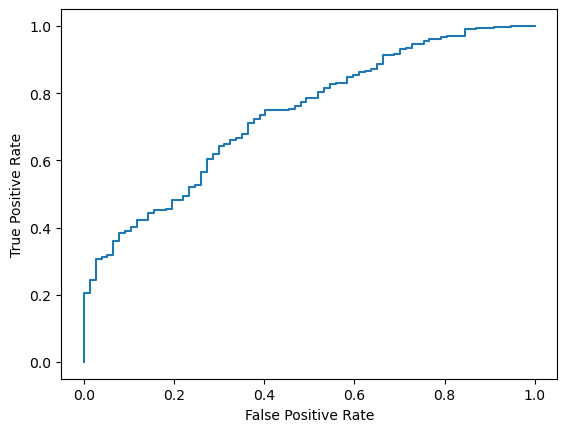

In [25]:
# roc curve
fpr, tpr, thresholds = metrics.roc_curve(df_w['gdhlth'], model.predict(df_w))
roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
roc.plot()
# roc.figure_.savefig('images/ROCcurve')

The Area Under the Curve (AUC) is a single scalar value that summarizes the performance of the model.  
Want this value close to one

In [26]:
metrics.roc_auc_score(df_w['gdhlth'], model.predict(df_w))

0.7362955010013834

# Preprocessing, Modeling and Prediction

In [27]:
df["hadnap"] = (df['sleep'] < df["slpnaps"]).astype(int)
df

age  educ  gdhlth  inlf  male  marr  selfe  sleep  slpnaps  totwrk  \
0     32    12       0     1     1     1      0   3113     3163    3438   
1     31    14       1     1     1     0      1   2920     2920    5020   
2     44    17       1     1     1     1      1   2670     2760    2815   
3     30    12       1     1     0     1      1   3083     3083    3786   
4     64    14       1     1     1     1      0   3448     3493    2580   
..   ...   ...     ...   ...   ...   ...    ...    ...      ...     ...   
701   45    12       1     0     0     1      0   2985     3385    2026   
702   34    10       0     0     1     1      0   3520     3535     675   
703   37    12       1     0     0     1      0   3510     3510    1851   
704   54    17       1     0     0     1      1   2970     3000    1961   
705   30    16       1     0     0     1      0   2970     3415    2363   

     hadnap  
0         1  
1         0  
2         1  
3         0  
4         1  
..      ...  
701       1  
702       1  
703       0  
704       1  
705       1  

[706 rows x 11 columns]

In [28]:
X = df.drop(columns=["gdhlth", "slpnaps"])
y = df["gdhlth"]
numerical_cols = ["age", "sleep", "totwrk"]

## Logistic Model

In [29]:
criterion = lambda formula, data: smf.logit(formula, data=data).fit().aic

In [30]:
def add(data, selected_columns, columns, criterion):
    best_criterion = np.inf
    best_column = None
    for column in columns - selected_columns:
        new_columns = selected_columns.union({column})
        formula = 'gdhlth ~ '+'+'.join(new_columns)
        current_criterion = criterion(formula, df)
        if current_criterion < best_criterion:
            best_criterion = current_criterion
            best_column = column
    return selected_columns.union({best_column}), best_criterion

In [31]:
def forward(data, criterion):
    selected_columns = set()
    columns = set(X.columns)
    best_criterion = np.inf
    while len(selected_columns) < len(columns):
        potential_columns, current_criterion = add(data, selected_columns, columns, criterion)
        if current_criterion > best_criterion:
            break
        else:
            selected_columns = potential_columns
            best_criterion = current_criterion
    return selected_columns

In [32]:
selected_columns = forward(df, criterion)

Optimization terminated successfully.
         Current function value: 0.339598
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315347
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.343237
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339297
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.344047
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.340256
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.342287
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.344491
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.339061
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.315118
  

In [33]:
selected_columns

{'educ', 'marr', 'totwrk'}

In [34]:
formula = 'gdhlth ~ educ + marr + slpnaps + totwrk'
logistic_model = smf.logit(formula, data=df).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.304748
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 gdhlth   No. Observations:                  706
Model:                          Logit   Df Residuals:                      701
Method:                           MLE   Df Model:                            4
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.1155
Time:                        16:21:40   Log-Likelihood:                -215.15
converged:                       True   LL-Null:                       -243.26
Covariance Type:            nonrobust   LLR p-value:                 1.812e-11
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9026      1.244     -0.725      0.468      -3.341       1.536
educ           0.2664      0.

In [35]:
def forward_2variables(df, criterion, selected_columns, best_criterion):
    columns = set()
    for i in range(len(X.columns)):
        for j in range(i+1, len(X.columns)):
            columns.add(X.columns[i]+':'+X.columns[j])
    while len(selected_columns) < (4+0.5*len(X.columns)*(len(X.columns)-1)):
        potential_columns, current_criterion = add(df, selected_columns, columns, criterion)
        if current_criterion > best_criterion:
            break
        else:
            selected_columns = potential_columns
            best_criterion = current_criterion
    return selected_columns

In [36]:
best_criterion = criterion(formula, df)
selected_columns_2 = forward_2variables(df, criterion, selected_columns, best_criterion)
selected_columns_2

Optimization terminated successfully.
         Current function value: 0.304748
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305679
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304908
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305918
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305457
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.305287
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.304594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306234
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306110
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.306264
  

{'age:hadnap',
 'age:inlf',
 'educ',
 'inlf:marr',
 'male:selfe',
 'marr',
 'totwrk',
 'totwrk:hadnap'}

In [37]:
formula = 'gdhlth ~ '+'+'.join(selected_columns_2)
logistic_model = smf.logit(formula, data=df).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.294037
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 gdhlth   No. Observations:                  706
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.1466
Time:                        16:21:43   Log-Likelihood:                -207.59
converged:                       True   LL-Null:                       -243.26
Covariance Type:            nonrobust   LLR p-value:                 2.666e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4681      0.855     -2.887      0.004      -4.144      -0.793
totwrk:hadnap     0.

In [38]:
#cross validation
train, test = train_test_split(df, test_size = 0.2, random_state = 1)
train.shape, test.shape

((564, 11), (142, 11))

In [39]:
yhat_test = logistic_model.predict(test)
error = np.sum((test['gdhlth'] - (yhat_test>=0.5)) ** 2)
error #???

16

In [40]:
for i in range(100):
    train, test = train_test_split(df, test_size = 0.2, random_state = 1)
    current_logistic_model = smf.logit(formula, data=train).fit()
    current_yhat_test = current_logistic_model.predict(test)
    #current_error = np.sum((test['gdhlth'] - current_yhat_test) ** 2)
    current_error = np.sum((test['gdhlth'] - (current_yhat_test>=0.5)) ** 2)
    if current_error<error:
        error = current_error
        logistic_model = current_logistic_model

Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.284285
  

In [41]:
print(logistic_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 gdhlth   No. Observations:                  706
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.1466
Time:                        16:21:45   Log-Likelihood:                -207.59
converged:                       True   LL-Null:                       -243.26
Covariance Type:            nonrobust   LLR p-value:                 2.666e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4681      0.855     -2.887      0.004      -4.144      -0.793
totwrk:hadnap     0.0005      0.000      2.392      0.017    9.89e-05       0.001
educ              0.2907      0.051     

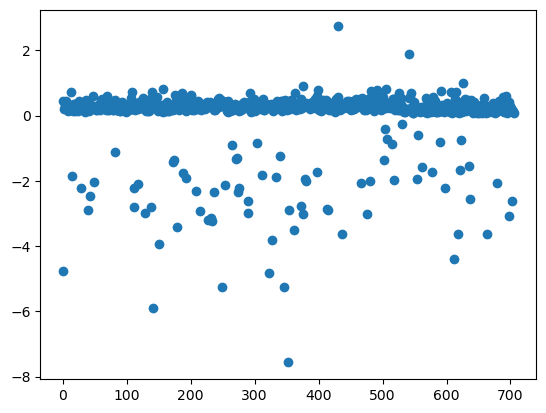

In [42]:
#plots of results
fitted = logistic_model.fittedvalues
residuals = logistic_model.resid_pearson
plt.scatter(range(len(residuals)), residuals)

In [43]:
threshold = 0.5
while True:
    c_matrix = logistic_model.pred_table(threshold=threshold)
    error_rate = c_matrix[0, 1] / c_matrix[0].sum() + c_matrix[1, 0] / c_matrix[1].sum()
    c_matrix_increase = logistic_model.pred_table(threshold=threshold+0.01)
    error_rate_increase = c_matrix_increase[0, 1] / c_matrix_increase[0].sum() + c_matrix_increase[1, 0] / c_matrix_increase[1].sum()
    c_matrix_decrease = logistic_model.pred_table(threshold=threshold-0.01)
    error_rate_decrease = c_matrix_decrease[0, 1] / c_matrix_decrease[0].sum() + c_matrix_decrease[1, 0] / c_matrix_decrease[1].sum()
    if error_rate_decrease<error_rate and error_rate_decrease<=error_rate_increase: 
        threshold = threshold-0.001
    elif error_rate_increase<error_rate: 
        threshold = threshold+0.001
    else:
        break
c_matrix, threshold

(array([[  9.,  68.],
        [  2., 627.]]),
 0.498)

In [56]:
true_pos = c_matrix[1, 1] / c_matrix[1].sum()
true_neg = c_matrix[0, 0] / c_matrix[0].sum()
false_pos = c_matrix[0, 1] / c_matrix[0].sum()
false_neg = c_matrix[1, 0] / c_matrix[1].sum()
print(f' True Positive: {true_pos: .3f}\n True Negative: {true_neg: .3f}\
\n False Positive: {false_pos: .3f}\n False Negative: {false_neg: .3f}')

 True Positive:  0.997
 True Negative:  0.117
 False Positive:  0.883
 False Negative:  0.003


## RandomForestClassifier

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=14)

In [46]:
def gdhlth_model(trainX, trainy):  
    def minMaxer(da):
        result = da.copy()
        for col in da.columns:
            result[col] = df.groupby("male")[col].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
        return result

    def standarizer(da):   
        result = da.copy()
        for col in da.columns:
            result[col] = df.groupby("male")[col].transform(lambda x: (x - x.mean()) / x.std())
        return result
        
    preprocessor = ColumnTransformer(
        transformers=[
            ('minmax', FunctionTransformer(minMaxer, validate=False), numerical_cols),
            ('stand', FunctionTransformer(standarizer, validate=False), numerical_cols),
        ],
        remainder='passthrough'
    )
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(max_depth=5)),
    ])

    model.fit(trainX, trainy)

    return model

mdl = gdhlth_model(X_train, y_train)

In [47]:
yhat_train = mdl.predict(X_train)
print(classification_report(yhat_train, y_train, zero_division=0))

              precision    recall  f1-score   support

           0       0.24      1.00      0.39        15
           1       1.00      0.91      0.96       549

    accuracy                           0.92       564
   macro avg       0.62      0.96      0.67       564
weighted avg       0.98      0.92      0.94       564



In [48]:
yhat_test = mdl.predict(X_test)
print(classification_report(yhat_test, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      0.89      0.94       140

    accuracy                           0.88       142
   macro avg       0.49      0.45      0.47       142
weighted avg       0.97      0.88      0.92       142



In [49]:
feature_importances = mdl.named_steps['classifier'].feature_importances_

feature_names = X_train.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

sleep: 0.19870484553961093
educ: 0.14500237907765026
marr: 0.13036159582116372
age: 0.12582033298539017
male: 0.11642071473677025
selfe: 0.10772954909322795
inlf: 0.0986416227684117
hadnap: 0.01814736222193847
totwrk: 0.011835339076470906


In [50]:
param_grid = {
    'classifier__n_estimators': [100, 150, 250],
    'classifier__max_depth': [None, 5, 20],
    'classifier__min_samples_split': [2, 20],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ["entropy", "gini"]
}

grid_search = GridSearchCV(estimator=mdl, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_score = best_model.score(X_test, y_test)
print("Test set accuracy:", test_score)

Best hyperparameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.9007269279393173
Test set accuracy: 0.8873239436619719


In [51]:
print(best_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax',
                                                  FunctionTransformer(func=<function gdhlth_model.<locals>.minMaxer at 0x7ff714bf6c20>),
                                                  ['age', 'sleep', 'totwrk']),
                                                 ('stand',
                                                  FunctionTransformer(func=<function gdhlth_model.<locals>.standarizer at 0x7ff714bf6cb0>),
                                                  ['age', 'sleep',
                                                   'totwrk'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5))])


In [52]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('minmax',
                                                  FunctionTransformer(func=<function gdhlth_model.<locals>.minMaxer at 0x7ff714bf6c20>),
                                                  ['age', 'sleep', 'totwrk']),
                                                 ('stand',
                                                  FunctionTransformer(func=<function gdhlth_model.<locals>.standarizer at 0x7ff714bf6cb0>),
                                                  ['age', 'sleep',
                                                   'totwrk'])])),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5))])

In [53]:
yhat_train = best_model.predict(X_train)
print(classification_report(yhat_train, y_train, zero_division=0))

              precision    recall  f1-score   support

           0       0.23      1.00      0.37        14
           1       1.00      0.91      0.95       550

    accuracy                           0.91       564
   macro avg       0.61      0.96      0.66       564
weighted avg       0.98      0.91      0.94       564



In [54]:
yhat_test = best_model.predict(X_test)
print(classification_report(yhat_test, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.99      0.89      0.94       141

    accuracy                           0.89       142
   macro avg       0.50      0.45      0.47       142
weighted avg       0.99      0.89      0.93       142



In [55]:
feature_importances = best_model.named_steps['classifier'].feature_importances_

feature_names = X_train.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))

sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

sleep: 0.19947264891618396
marr: 0.13086014609146687
educ: 0.1308571001325919
inlf: 0.12804777348373234
age: 0.12344613461690096
male: 0.10967954077075824
selfe: 0.09309261980438444
totwrk: 0.020187841841874613
hadnap: 0.015054592317877976


# Future Works
- Analysis on factors that significantly influences sleep duration/quality. 